In [2]:
# import libraries

## PART 1
import pandas as pd
import matplotlib.pyplot as plt

## PART 2
import numpy as np # Math
import talib    # SMA / RSI
import statsmodels.api as sm  #Linear Modeling
import seaborn as sns # heatmap

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = [7, 6]
pd.options.mode.chained_assignment = None  # default='warn'

In [6]:
# Converting CSV to Dataframe
cereal_df = pd.read_csv("Cereals.xls")

In [7]:
# see first 5 rows of data
cereal_df.head()

,Name,Manuf,Type,Calories,Protein,Fat,Sodium,Fiber,Carbo,Sugars,...,Weight,Cups,Rating,Cold,Nabisco,Quaker,Kelloggs,GeneralMills,Ralston,AHFP
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,...,1.0,0.33,68.402973,1,1,0,0,0,0,0
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,...,1.0,1.00,33.983679,1,0,1,0,0,0,0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,...,1.0,0.33,59.425505,1,0,0,1,0,0,0
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,...,1.0,0.50,93.704912,1,0,0,1,0,0,0
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,...,1.0,0.75,34.384843,1,0,0,0,0,1,0


In [30]:
cereal_df.shape

(77, 23)

In [29]:
cereal_df.isnull().values.any()

True

In [31]:
cereal_df[cereal_df.isna().any(axis=1)]

,Name,Manuf,Type,Calories,Protein,Fat,Sodium,Fiber,Carbo,Sugars,...,Weight,Cups,Rating,Cold,Nabisco,Quaker,Kelloggs,GeneralMills,Ralston,AHFP
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,...,1.0,0.75,34.384843,1,0,0,0,0,1,0
20,Cream_of_Wheat_(Quick),N,H,100,3,0,80,1.0,21.0,0.0,...,1.0,1.00,64.533816,0,1,0,0,0,0,0
57,Quaker_Oatmeal,Q,H,100,5,2,0,2.7,NaN,NaN,...,1.0,0.67,50.828392,0,0,1,0,0,0,0


In [32]:
cereal_df = cereal_df.dropna()

In [33]:
cereal_df.shape

(74, 23)

In [34]:
cereal_df.columns

Index(['Name', 'Manuf', 'Type', 'Calories', 'Protein', 'Fat', 'Sodium',
       'Fiber', 'Carbo', 'Sugars', 'Potass', 'Vitamins', 'Shelf', 'Weight',
       'Cups', 'Rating', 'Cold', 'Nabisco', 'Quaker', 'Kelloggs',
       'GeneralMills', 'Ralston', 'AHFP'],
      dtype='object')

In [35]:
# Correlation 
corr = cereal_df[ ['Rating', 'Sugars']].corr()
corr

,Rating,Sugars
Rating,1.000000,-0.755955
Sugars,-0.755955,1.000000


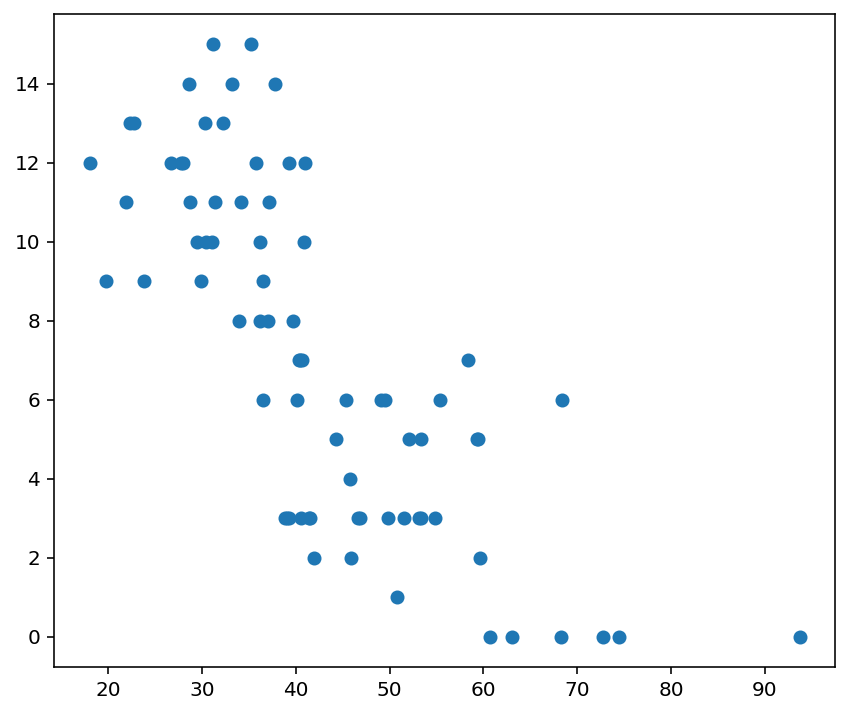

In [36]:
# scatterplot of the current 5-day percent change vs  future 5-day percent change
plt.scatter(cereal_df['Rating'], cereal_df['Sugars'])
plt.show()

In [37]:
corr = cereal_df[ ['Rating', 'Fiber']].corr()
corr

,Rating,Fiber
Rating,1.000000,0.603411
Fiber,0.603411,1.000000


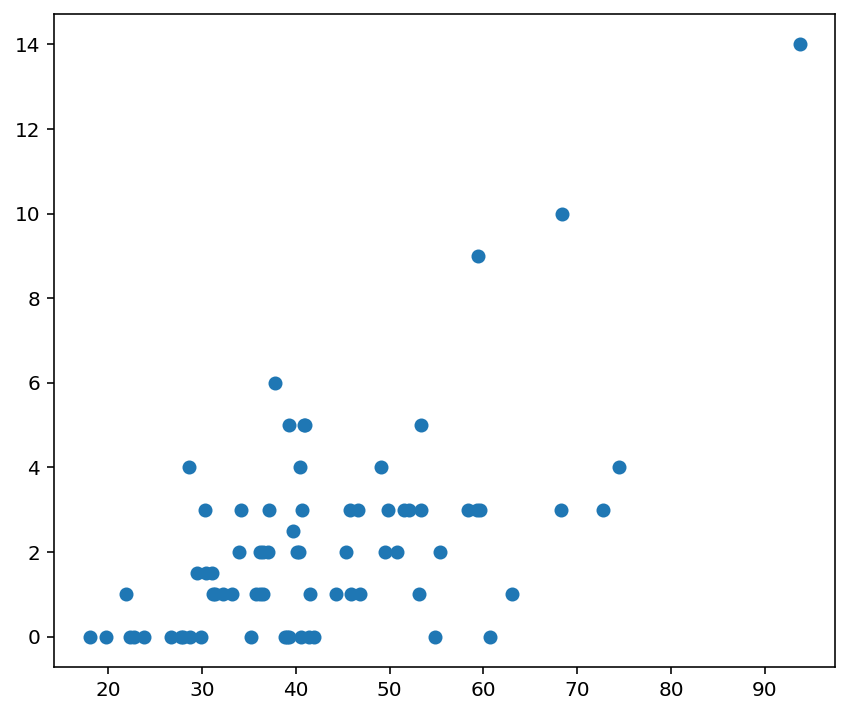

In [38]:
# scatterplot of the current 5-day percent change vs  future 5-day percent change
plt.scatter(cereal_df['Rating'], cereal_df['Fiber'])
plt.show()

In [39]:
feature_names = ['Sugars', 'Fiber']
feature_names 

['Sugars', 'Fiber']

In [40]:
# Creating features and targets
features = cereal_df[feature_names]
targets = cereal_df['Rating']

# Creating DataFrame from target column and feature columns
feature_and_target_cols = ['Rating'] + feature_names
feature_targ_df = cereal_df[feature_and_target_cols]

In [42]:
targets.shape

(74,)

In [43]:
features.shape

(74, 2)

In [44]:
# Calculating correlation matrix
corr_mat = feature_targ_df.corr()
corr_mat

,Rating,Sugars,Fiber
Rating,1.000000,-0.755955,0.603411
Sugars,-0.755955,1.000000,-0.150949
Fiber,0.603411,-0.150949,1.000000


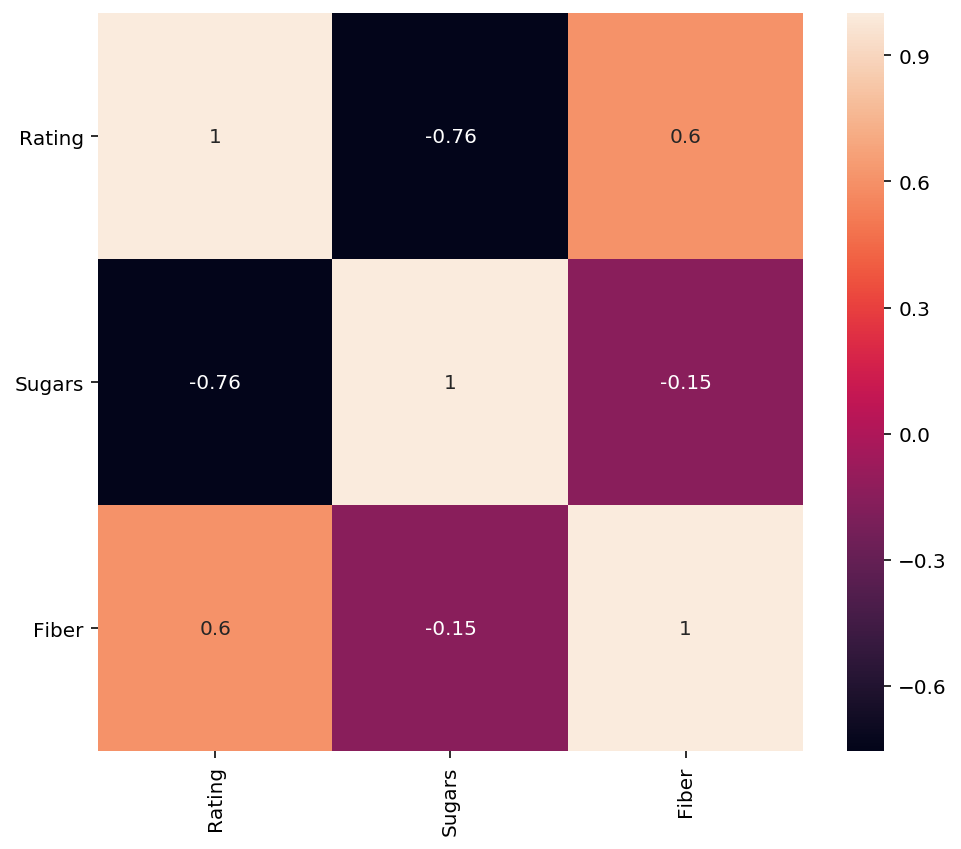

<Figure size 504x432 with 0 Axes>

In [45]:
# Plotting heatmap of correlation matrix
sns.heatmap(corr_mat, annot=True)
plt.yticks(rotation=0); plt.xticks(rotation=90) # Fix ticklabel directions
plt.tight_layout() # fits plot area to the plot, "tightly"
plt.show() # show the plot
plt.clf() # clear the plot area

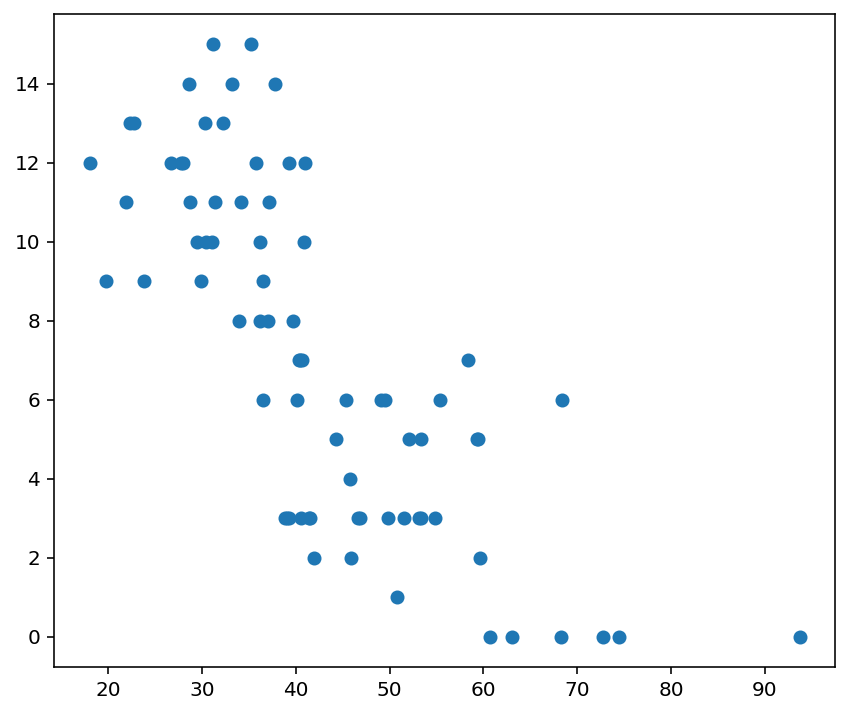

In [46]:
# Create a scatter plot of the most highly correlated variable with the target
plt.scatter(cereal_df['Rating'], cereal_df['Sugars'])
plt.show()

In [47]:
# we can fit our first machine learning Linear model
# need to add a constant to feature (column of ones = y-intercept)

# Adding a constant to our features
linear_features = sm.add_constant(features)

# Creating a size for the training set that is 85% of the total number of samples
train_size = int(0.85 * features.shape[0])

# Training set
train_features = linear_features[:train_size]
train_targets = targets[:train_size]

# Test set
test_features = linear_features[train_size:]
test_targets = targets[train_size: ]

print(linear_features.shape, train_features.shape, test_features.shape)

(74, 3) (62, 3) (12, 3)


In [48]:
# Fitting a Linear Model
model = sm.OLS(train_targets, train_features)
results = model.fit() # fit the model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     143.5
Date:                Tue, 10 Sep 2019   Prob (F-statistic):           2.19e-23
Time:                        15:12:52   Log-Likelihood:                -197.11
No. Observations:                  62   AIC:                             400.2
Df Residuals:                      59   BIC:                             406.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.7462      1.770     29.233      0.000      48.204      55.288
Sugars        -2.2204      0.183    -12.138      0.000      -2.586      -1.854
Fiber          2.8796      0.301      9.560      0.000       2.277       3.482
==============================================================================
Omnibus:                        6.377   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                5.786
Skew:                           0.738   Prob(JB):                       0.0554
Kurtosis:                       3.248   Cond. No.                         20.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# Examine the p-values
# Features with p<= 0.05 are typically considered significantly different from 0

results.pvalues

const     8.456383e-37
Sugars    1.111691e-17
Fiber     1.348279e-13
dtype: float64

In [50]:
# Make predictions from our model for train and test sets
train_predictions = results.predict(train_features)
test_predictions = results.predict(test_features)

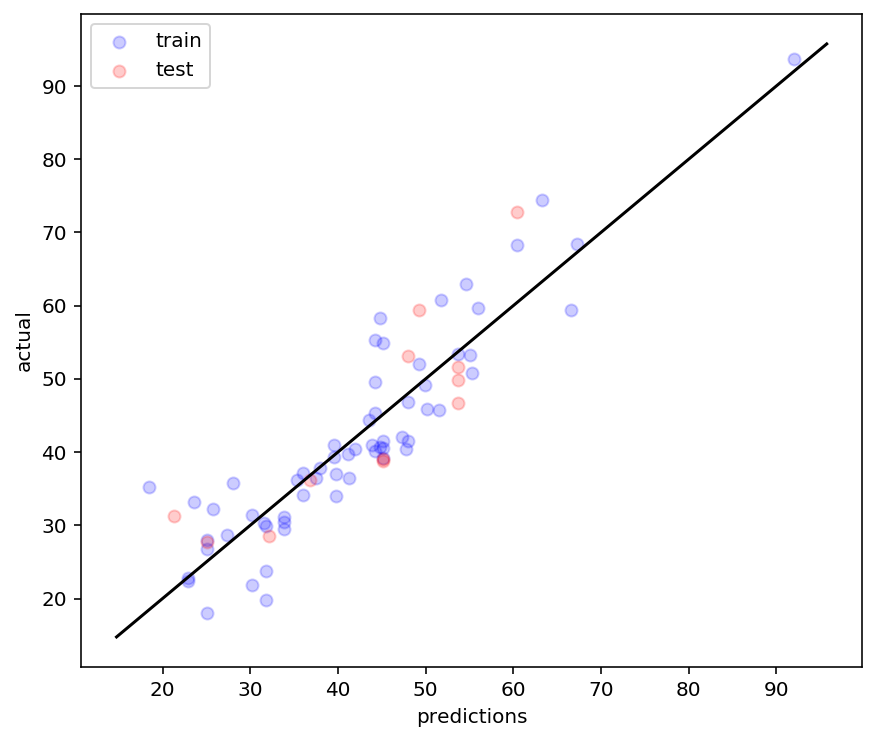

In [51]:
# Seeing how good the predictions are, is our model any good?
# Plotting the prediction versus the actual values of the targets

# Scatter the predictions vs the targets with 80% transparency
plt.scatter(train_predictions, train_targets, alpha=0.2, color='b', label='train')
plt.scatter(test_predictions, test_targets, alpha=0.2, color='r', label='test')

# Plot the perfect prediction line
xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k')

# Set the axis labels and show the plot
plt.xlabel('predictions')
plt.ylabel('actual')
plt.legend()  # show the legend
plt.show()

## NEURAL NETWORKS

In [52]:
# Some models like neural networks work better with scaled data - so we need to standardize our data

In [56]:
# Scaling options: standardization
# subtracts the mean from all data points, the divides by the standard deviation - sets mean to 0 and standard deviation to 1

from sklearn.preprocessing import scale

# fits the scaler to the training data and transforms it at the same time
scaled_train_features = scale(train_features)

# transforms test data
scaled_test_features = scale(test_features)


## Build and fit simple neural net

In [14]:
## PART 3
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model_1 = Sequential()
model_1.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_1.add(Dense(____, activation=____))
model_1.add(Dense(____, activation=____))